In [325]:
import pandas as pd
import seaborn as sns
import numpy as np

veri = pd.read_csv("airquality.csv")
df = veri.copy()

In [326]:
df.head()

,Date,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )
0,01.11.2023 00:00:56,140.91,32.46,181.59
1,01.11.2023 01:00:56,130.73,31.16,79.33
2,01.11.2023 02:00:56,111.21,27.37,72.99
3,01.11.2023 03:00:56,90.39,21.52,46.58
4,01.11.2023 04:00:56,70.66,17.71,36.43


In [327]:
df.info()
# tip ciktisi alir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              697 non-null    object 
 1   PM10 ( µg/m3 )    697 non-null    float64
 2   PM 2.5 ( µg/m3 )  697 non-null    float64
 3   NOX ( µg/m3 )     697 non-null    float64
dtypes: float64(3), object(1)
memory usage: 21.9+ KB


In [328]:
df.shape
# satir sutun sayisi


(697, 4)

In [329]:
df.nunique()

Date                697
PM10 ( µg/m3 )      545
PM 2.5 ( µg/m3 )    545
NOX ( µg/m3 )       605
dtype: int64

In [330]:
df.describe()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )
count,697.000000,697.000000,697.000000
mean,32.804189,10.589828,28.544232
std,32.505337,7.563946,29.766267
min,0.000000,0.000000,0.000000
25%,8.730000,4.820000,6.840000
50%,24.320000,9.880000,16.710000
75%,47.370000,15.530000,44.470000
max,154.330000,37.470000,181.590000


In [331]:
df[["PM10 ( µg/m3 )","PM 2.5 ( µg/m3 )","NOX ( µg/m3 )"]].corr()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )
PM10 ( µg/m3 ),1.000000,0.736599,0.385530
PM 2.5 ( µg/m3 ),0.736599,1.000000,0.583064
NOX ( µg/m3 ),0.385530,0.583064,1.000000


In [332]:
df.isnull()

,Date,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
692,False,False,False,False
693,False,False,False,False
694,False,False,False,False
695,False,False,False,False


In [333]:
df.isnull().sum()

Date                0
PM10 ( µg/m3 )      0
PM 2.5 ( µg/m3 )    0
NOX ( µg/m3 )       0
dtype: int64

In [334]:
df[df.duplicated()]

,Date,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )


<Axes: >

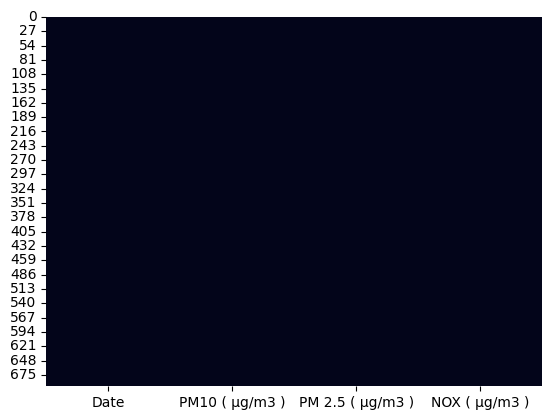

In [335]:
sns.heatmap(df.isnull(), cbar=False)

In [336]:
count = 0;
for i in df["PM10 ( µg/m3 )"] :
  if i == 0.0 :
      count+=1
      
print(count)

136


In [337]:
pm10_means = df[df["PM10 ( µg/m3 )"] != 0.0]["PM10 ( µg/m3 )"].mean()
pm25_means = df[df["PM 2.5 ( µg/m3 )"] != 0.0]["PM 2.5 ( µg/m3 )"].mean()
nox_means = df[df["NOX ( µg/m3 )"] != 0.0]["NOX ( µg/m3 )"].mean()
print(pm10_means)
print(pm25_means)
print(nox_means)

40.756720142602504
11.982321428571428
30.893369565217395


In [338]:
df["PM10 ( µg/m3 )"] = np.where(df["PM10 ( µg/m3 )"] == 0.0, pm10_means, df["PM10 ( µg/m3 )"])
df["PM 2.5 ( µg/m3 )"] = np.where(df["PM 2.5 ( µg/m3 )"] == 0.0, pm25_means, df["PM 2.5 ( µg/m3 )"])
df["NOX ( µg/m3 )"] = np.where(df["NOX ( µg/m3 )"] == 0.0, nox_means, df["NOX ( µg/m3 )"])

# 0 olan degerleri 0 olmayan degerlerin ortalamasiyla degistirildi



In [339]:
df.describe()

,PM10 ( µg/m3 ),PM 2.5 ( µg/m3 ),NOX ( µg/m3 )
count,697.000000,697.000000,697.00000
mean,40.756720,11.982321,30.89337
std,28.201876,6.515046,28.61608
min,0.610000,0.130000,0.56000
25%,19.270000,7.130000,8.92000
50%,40.756720,11.982321,22.56000
75%,47.370000,15.530000,44.47000
max,154.330000,37.470000,181.59000
